<a href="https://colab.research.google.com/github/garry-p12/DSC240_HW2/blob/main/DSC240_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 2

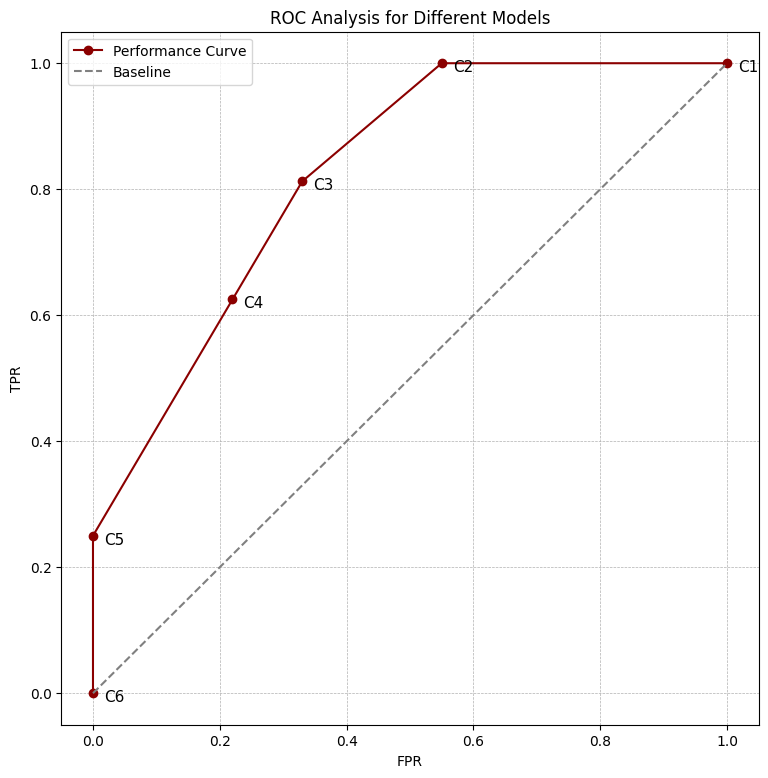

In [12]:
#Problem 2


import matplotlib.pyplot as plt


models = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
false_positive_rate = [1, 0.55, 0.33, 0.22, 0, 0]
true_positive_rate = [1, 1, 0.8125, 0.625, 0.25, 0]


plt.figure(figsize=(9, 9))


plt.plot(false_positive_rate, true_positive_rate, marker='o', linestyle='-', color='darkred', label='Performance Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Baseline')


for idx, label in enumerate(models):
    plt.annotate(label, (false_positive_rate[idx], true_positive_rate[idx]), textcoords="offset points", xytext=(8, -6), ha='left', fontsize=11)


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Analysis for Different Models")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)


plt.show()


##Problem 3

In [22]:


import numpy as np

# Define dataset with feature points and corresponding labels
dataset = [
    ((2, 2, 3), 1),
    ((3, 3, 2), 1),
    ((1, 2, 3), 1),
    ((1, 4, 1), 1),
    ((4, 4, 4), 1),
    ((2, 2, 2), 1),
    ((3, 3, 1), -1),
    ((1, 1, 1), -1),
    ((3, 2, 2), -1),
    ((0, 4, 2), -1),
    ((4, 0, 0), -1),
    ((0, 0, 3), -1),
]

# Define weight vector and bias term
weight_vector = np.array([3, 2, 4])
bias_term = -18

# Compute the norm of the weight vector
norm_weight = np.linalg.norm(weight_vector)

# Function to compute the linear function value
def linear_combination(features):
    return np.dot(weight_vector, features) + bias_term

# Function to compute the margin
def compute_margin(features):
    return abs(linear_combination(features) / norm_weight)

# Function to compute hinge loss
def compute_hinge_loss(label, features):
    return max(0, 1 - label * linear_combination(features))

# Function to compute squared loss
def compute_squared_loss(label, features):
    return (label - linear_combination(features)) ** 2

# Iterate over dataset and compute values
for (features, label) in dataset:
    margin_value = compute_margin(np.array(features))
    hinge_loss_value = compute_hinge_loss(label, np.array(features))
    squared_loss_value = compute_squared_loss(label, np.array(features))

    print(f"Feature: {features}, Label: {label}, Margin: {margin_value:.4f}, "
          f"Hinge Loss: {hinge_loss_value:.4f}, Squared Loss: {squared_loss_value:.4f}")


Feature: (2, 2, 3), Label: 1, Margin: 0.7428, Hinge Loss: 0.0000, Squared Loss: 9.0000
Feature: (3, 3, 2), Label: 1, Margin: 0.9285, Hinge Loss: 0.0000, Squared Loss: 16.0000
Feature: (1, 2, 3), Label: 1, Margin: 0.1857, Hinge Loss: 0.0000, Squared Loss: 0.0000
Feature: (1, 4, 1), Label: 1, Margin: 0.5571, Hinge Loss: 4.0000, Squared Loss: 16.0000
Feature: (4, 4, 4), Label: 1, Margin: 3.3425, Hinge Loss: 0.0000, Squared Loss: 289.0000
Feature: (2, 2, 2), Label: 1, Margin: 0.0000, Hinge Loss: 1.0000, Squared Loss: 1.0000
Feature: (3, 3, 1), Label: -1, Margin: 0.1857, Hinge Loss: 2.0000, Squared Loss: 4.0000
Feature: (1, 1, 1), Label: -1, Margin: 1.6713, Hinge Loss: 0.0000, Squared Loss: 64.0000
Feature: (3, 2, 2), Label: -1, Margin: 0.5571, Hinge Loss: 4.0000, Squared Loss: 16.0000
Feature: (0, 4, 2), Label: -1, Margin: 0.3714, Hinge Loss: 0.0000, Squared Loss: 1.0000
Feature: (4, 0, 0), Label: -1, Margin: 1.1142, Hinge Loss: 0.0000, Squared Loss: 25.0000
Feature: (0, 0, 3), Label: -1, 

## Problem 5

In [16]:
#Problem 5

import numpy as np

# Load dataset
features = np.load('/content/data_X_Q5Q6.npy')
targets = np.load('/content/data_y_Q5Q6.npy')

# Add intercept term
features = np.c_[np.ones(features.shape[0]), features]

# Hyperparameters
learning_rate = 0.01  # Step size
iterations = 1000  # Training epochs
reg_strength = 1e-6  # Regularization factor

# Batch Gradient Descent
def batch_gradient_descent(X, y, lr, num_iters, reg_param=0):
    num_samples, num_features = X.shape
    weights = np.zeros((num_features, 1))
    for _ in range(num_iters):
        grad = (X.T @ (X @ weights - y) + reg_param * weights) / num_samples
        weights -= lr * grad
    return weights

# Stochastic Gradient Descent
def mini_batch_sgd(X, y, lr, num_iters, reg_param=0):
    num_samples, num_features = X.shape
    weights = np.zeros((num_features, 1))
    for _ in range(num_iters):
        for i in range(num_samples):
            x_i = X[i, :].reshape(1, -1)
            y_i = y[i]
            grad = x_i.T @ (x_i @ weights - y_i) + reg_param * weights
            weights -= lr * grad
    return weights

# Closed-Form Solution
def normal_equation_solution(X, y, reg_param=0):
    num_features = X.shape[1]
    identity_matrix = np.eye(num_features)
    identity_matrix[0, 0] = 0  # Do not regularize intercept term
    return np.linalg.inv(X.T @ X + reg_param * identity_matrix) @ X.T @ y

# Compute solutions
weights_gd_lsqr = batch_gradient_descent(features, targets, learning_rate, iterations)
weights_sgd_lsqr = mini_batch_sgd(features, targets, learning_rate, iterations)
weights_closed_lsqr = normal_equation_solution(features, targets)

weights_gd_ridge = batch_gradient_descent(features, targets, learning_rate, iterations, reg_strength)
weights_sgd_ridge = mini_batch_sgd(features, targets, learning_rate, iterations, reg_strength)
weights_closed_ridge = normal_equation_solution(features, targets, reg_strength)

# Compute Euclidean (L2) distances
def l2_distance(w1, w2):
    return np.linalg.norm(w1 - w2)

distance_metrics = {
    "LSQR_GD_vs_SGD": l2_distance(weights_gd_lsqr, weights_sgd_lsqr),
    "LSQR_GD_vs_Closed": l2_distance(weights_gd_lsqr, weights_closed_lsqr),
    "LSQR_SGD_vs_Closed": l2_distance(weights_sgd_lsqr, weights_closed_lsqr),
    "Ridge_GD_vs_SGD": l2_distance(weights_gd_ridge, weights_sgd_ridge),
    "Ridge_GD_vs_Closed": l2_distance(weights_gd_ridge, weights_closed_ridge),
    "Ridge_SGD_vs_Closed": l2_distance(weights_sgd_ridge, weights_closed_ridge),
}

# Display results
for metric, value in distance_metrics.items():
    print(f"{metric}: {value:.6f}")


LSQR_GD_vs_SGD: 6.874165
LSQR_GD_vs_Closed: 6.832557
LSQR_SGD_vs_Closed: 0.311339
Ridge_GD_vs_SGD: 6.866104
Ridge_GD_vs_Closed: 6.832556
Ridge_SGD_vs_Closed: 0.310671


## Problem 6

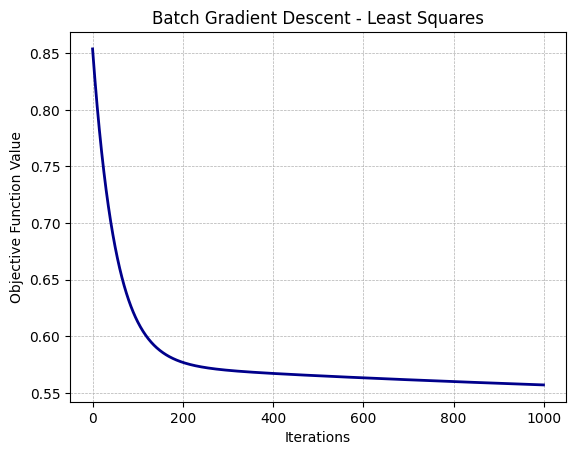

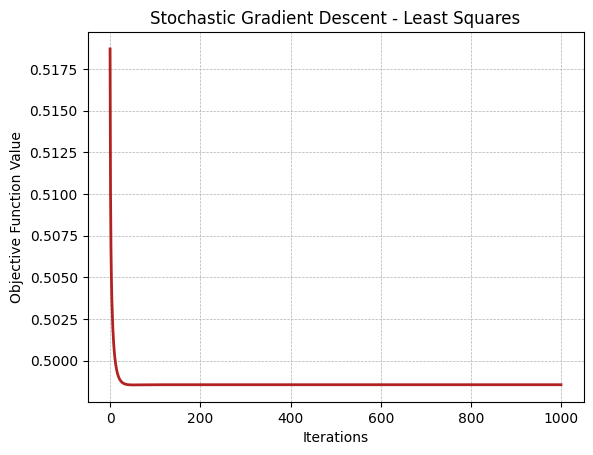

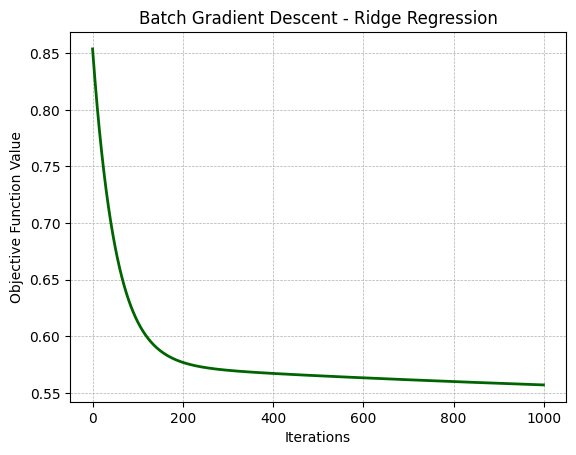

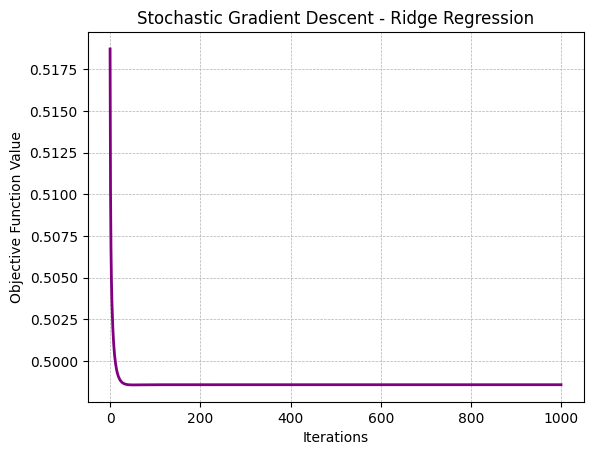

In [19]:
#Problem 6

import numpy as np
import matplotlib.pyplot as plt

# Load dataset
features = np.load('/content/data_X_Q5Q6.npy')
labels = np.load('/content/data_y_Q5Q6.npy')

# Add intercept term to features
features = np.c_[np.ones(features.shape[0]), features]

# Hyperparameters
learning_rate = 0.01  # Step size
num_iterations = 1000  # Training cycles
reg_factor = 1e-6  # Regularization coefficient

# Compute objective function value
def calculate_loss(X, y, weights, reg_factor=0):
    num_samples = X.shape[0]
    error = np.linalg.norm(X @ weights - y) ** 2 / (2 * num_samples)
    regularization = (reg_factor / 2) * np.linalg.norm(weights) ** 2
    return error + regularization

# Batch Gradient Descent
def batch_gd(X, y, lr, iterations, reg_factor=0):
    num_samples, num_features = X.shape
    weights = np.zeros((num_features, 1))
    loss_history = []
    for _ in range(iterations):
        gradient = (X.T @ (X @ weights - y) + reg_factor * weights) / num_samples
        weights -= lr * gradient
        loss_history.append(calculate_loss(X, y, weights, reg_factor))
    return weights, loss_history

# Stochastic Gradient Descent
def sgd_optimizer(X, y, lr, iterations, reg_factor=0):
    num_samples, num_features = X.shape
    weights = np.zeros((num_features, 1))
    loss_history = []
    for _ in range(iterations):
        for i in range(num_samples):
            xi = X[i, :].reshape(1, -1)
            yi = y[i]
            gradient = xi.T @ (xi @ weights - yi) + reg_factor * weights
            weights -= lr * gradient
        loss_history.append(calculate_loss(X, y, weights, reg_factor))
    return weights, loss_history

# Closed-form solution for least squares regression
def normal_eq_solver(X, y, reg_factor=0):
    num_features = X.shape[1]
    identity_matrix = np.eye(num_features)
    identity_matrix[0, 0] = 0  # Do not regularize the intercept term
    return np.linalg.inv(X.T @ X + reg_factor * identity_matrix) @ X.T @ y

# Compute weights and loss history for different methods
weights_gd_lsqr, loss_gd_lsqr = batch_gd(features, labels, learning_rate, num_iterations)
weights_sgd_lsqr, loss_sgd_lsqr = sgd_optimizer(features, labels, learning_rate, num_iterations)
weights_gd_ridge, loss_gd_ridge = batch_gd(features, labels, learning_rate, num_iterations, reg_factor)
weights_sgd_ridge, loss_sgd_ridge = sgd_optimizer(features, labels, learning_rate, num_iterations, reg_factor)

# Function to plot learning curves
def visualize_learning(loss_history, title, color):
    plt.plot(range(len(loss_history)), loss_history, color=color, linewidth=2)
    plt.xlabel("Iterations")
    plt.ylabel("Objective Function Value")
    plt.title(title)
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.show()

# Plot learning curves with new colors and styles
visualize_learning(loss_gd_lsqr, "Batch Gradient Descent - Least Squares", "darkblue")
visualize_learning(loss_sgd_lsqr, "Stochastic Gradient Descent - Least Squares", "firebrick")
visualize_learning(loss_gd_ridge, "Batch Gradient Descent - Ridge Regression", "darkgreen")
visualize_learning(loss_sgd_ridge, "Stochastic Gradient Descent - Ridge Regression", "purple")


## Problem 7

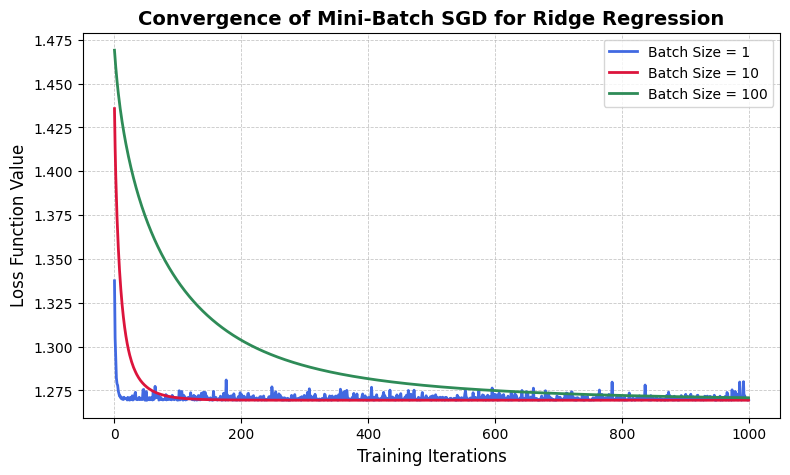

In [21]:
#Problem 7

import numpy as np
import matplotlib.pyplot as plt

# Load dataset
features = np.load('/content/data_X_Q7.npy')
targets = np.load('/content/data_y_Q7.npy')

# Hyperparameters
reg_strength = 0.01  # Regularization parameter
step_size = 0.001  # Learning rate
iterations = 1000  # Number of updates

# Initialize model parameters
weights = np.zeros((features.shape[1], 1))

# Compute Ridge Regression loss
def compute_ridge_loss(X, y, weights, reg_strength):
    error = y - X @ weights
    mse_loss = np.mean(error ** 2)
    reg_penalty = reg_strength * np.sum(weights ** 2)
    return mse_loss + reg_penalty

# Mini-batch Stochastic Gradient Descent for Ridge Regression
def mini_batch_sgd(X, y, batch_size, step_size, iterations, reg_strength):
    num_samples, num_features = X.shape
    weights = np.zeros((num_features, 1))
    loss_history = []

    for _ in range(iterations):
        # Shuffle dataset
        shuffled_indices = np.random.permutation(num_samples)
        X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

        # Process mini-batches
        for i in range(0, num_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Compute gradient
            residuals = y_batch - X_batch.dot(weights)
            grad = -2 * X_batch.T @ residuals / batch_size + 2 * reg_strength * weights

            # Update parameters
            weights -= step_size * grad

        # Store loss
        loss_history.append(compute_ridge_loss(X, y, weights, reg_strength))

    return weights, loss_history

# Run SGD with different batch sizes
batch_options = [1, 10, 100]
performance_results = {}

for batch in batch_options:
    final_weights, loss_values = mini_batch_sgd(features, targets, batch, step_size, iterations, reg_strength)
    performance_results[batch] = loss_values

# Plot learning curves
plt.figure(figsize=(9, 5))
colors = ['royalblue', 'crimson', 'seagreen']
for idx, (batch, loss_values) in enumerate(performance_results.items()):
    plt.plot(loss_values, color=colors[idx], linestyle='-', linewidth=2, label=f'Batch Size = {batch}')

plt.xlabel('Training Iterations', fontsize=12)
plt.ylabel('Loss Function Value', fontsize=12)
plt.title('Convergence of Mini-Batch SGD for Ridge Regression', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
plt.show()
